In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid, StratifiedKFold

In [2]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


# 模型评估与改进

## 交叉验证

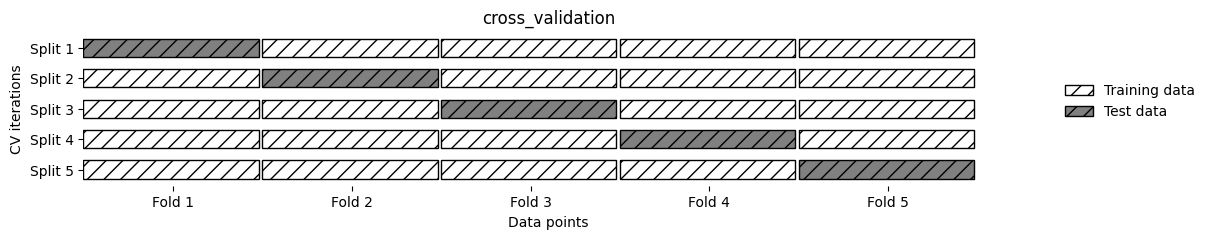

In [11]:
mglearn.plots.plot_cross_validation()

### scikit-learn中的交叉验证

In [8]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1_000)
scores = cross_val_score(logreg, iris.data, iris.target)
print('Cross-validation scores: {}'.format(scores))

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.97


In [27]:
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.009817,0.001001,0.966667,0.966667
1,0.012455,0.000000,1.000000,0.966667
2,0.008724,0.000000,0.933333,0.983333
3,0.010455,0.000000,0.966667,0.983333
4,0.010130,0.000000,1.000000,0.975000


In [28]:
print('Mean times and scores: \n',res_df.mean(axis=0))

Mean times and scores: 
 fit_time       0.010316
score_time     0.000200
test_score     0.973333
train_score    0.975000
dtype: float64


### 交叉验证的优点

### 分层k折交叉验证和其他策略

In [3]:
iris = load_iris()
print('Iris labels: \n{}'.format(iris.target))

Iris labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


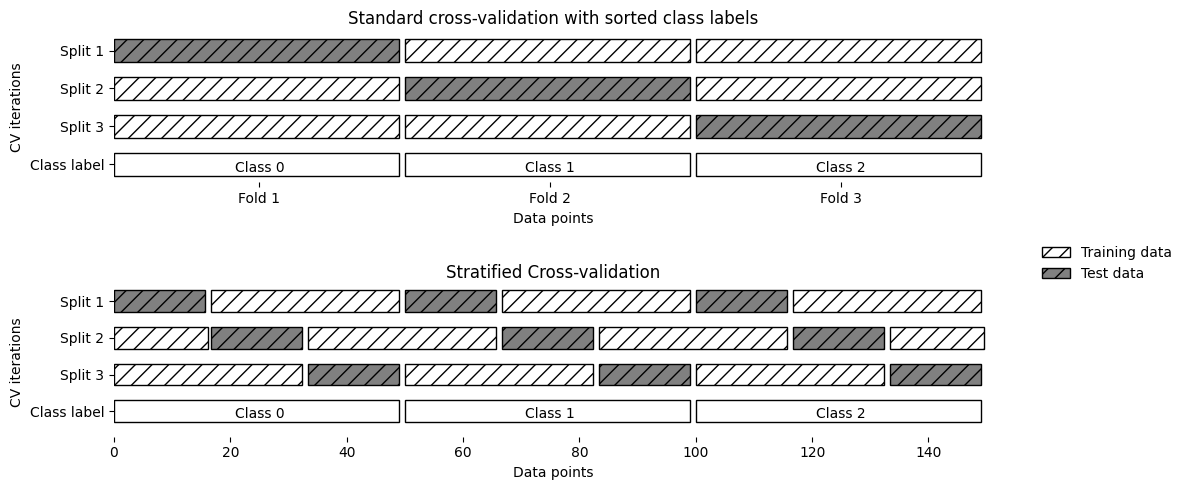

In [4]:
mglearn.plots.plot_stratified_cross_validation()

#### 对交叉验证的更多控制

In [9]:
kfold = KFold(n_splits=5)

In [10]:
print('Cross-validation scores: \n{}'.format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores: 
[1.         1.         0.86666667 0.93333333 0.83333333]


In [11]:
kfold = KFold(n_splits=3)
print('Cross-validation scores: \n{}'.format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores: 
[0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('Cross-validation scores: \n{}'.format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores: 
[0.98 0.96 0.96]


#### 留一法交叉验证

In [17]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('Number of cv iterations: ', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### 打乱划分交叉验证

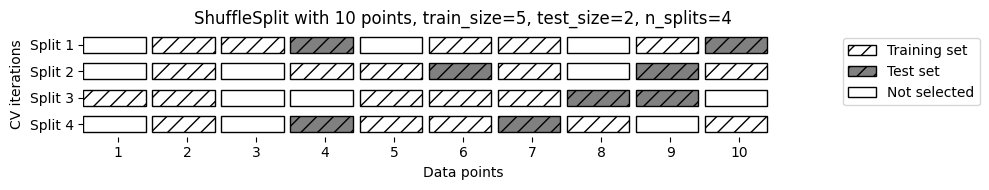

In [18]:
mglearn.plots.plot_shuffle_split()

In [29]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('Cross-validation scores: \n{}'.format(scores))

Cross-validation scores: 
[0.97333333 0.96       0.94666667 0.96       0.96       0.98666667
 0.96       0.96       0.96       0.94666667]


#### 分组交叉验证

In [36]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print('Cross-validation accuracy: \n{}'.format(scores))

Cross-validation accuracy: 
[0.75       0.6        0.66666667]


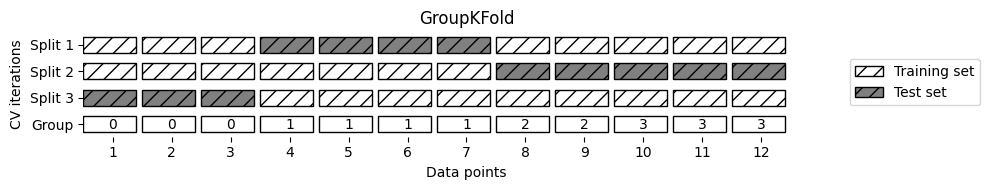

In [37]:
mglearn.plots.plot_group_kfold()

## 网格搜索

### 简单网格搜索

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
print('Size of training ste: {} size of test set: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print('Best score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Size of training ste: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 参数过拟合的风险与验证集

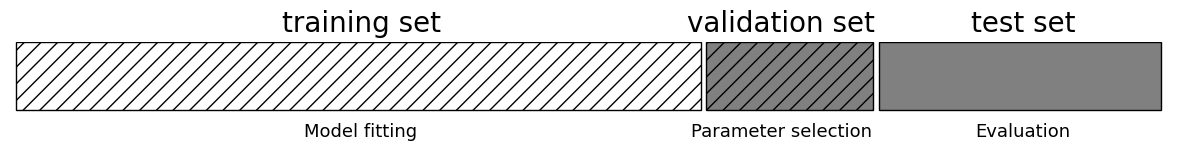

In [46]:
mglearn.plots.plot_threefold_split()

In [4]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,
                                                      random_state=1)
print("Size of training set: {} size of validation set: {} size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 带交叉验证的网格搜索

In [59]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [82]:
def plot_cross_val_selection():
    iris = load_iris()
    X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data,
                                                              iris.target,
                                                              random_state=0)

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                               return_train_score=True)
    grid_search.fit(X_trainval, y_trainval)
    results = pd.DataFrame(grid_search.cv_results_)[:]

    best = np.argmax(results.mean_test_score.values)
    plt.figure(figsize=(10, 3))
    plt.xlim(-1, len(results))
    plt.ylim(0, 1.1)
    for i, (_, row) in enumerate(results.iterrows()):
        scores = row[['split%d_test_score' % i for i in range(5)]]
        marker_cv, = plt.plot([i] * 5, scores, '^', c='gray', markersize=5,
                              alpha=.5)
        marker_mean, = plt.plot(i, row.mean_test_score, 'v', c='r', alpha=1,
                                markersize=7, markeredgecolor='k')
        if i == best:
            marker_best, = plt.plot(i, row.mean_test_score, 'o', c='red',
                                    fillstyle="none", alpha=1, markersize=15,
                                    markeredgewidth=1)

    plt.xticks(range(len(results)), [str(x).strip("{}").replace("'", "") for x
                                     in grid_search.cv_results_['params']],
               rotation=90)
    plt.ylabel("Validation accuracy")
    plt.xlabel("Parameter settings")
    plt.legend([marker_cv, marker_mean, marker_best],
               ["cv accuracy", "mean accuracy", "best parameter setting"],
               loc=(1.05, .4))

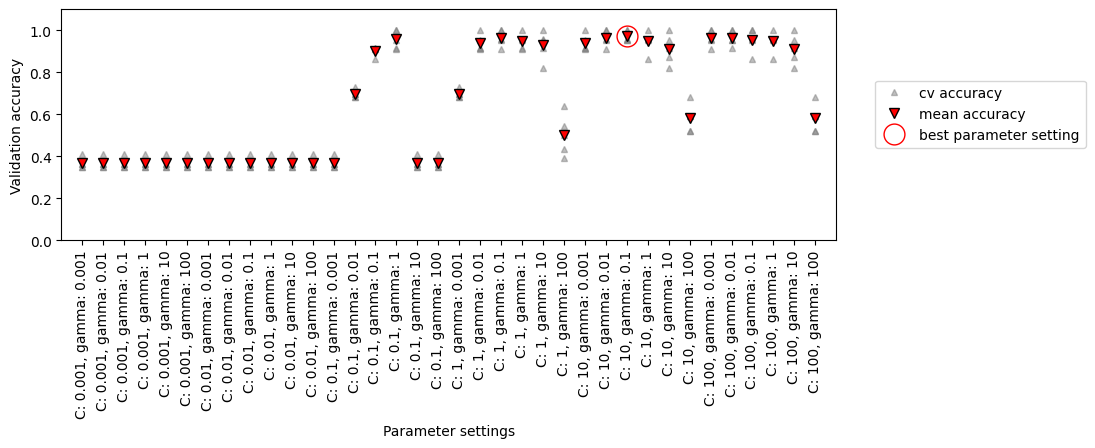

In [83]:
plot_cross_val_selection()

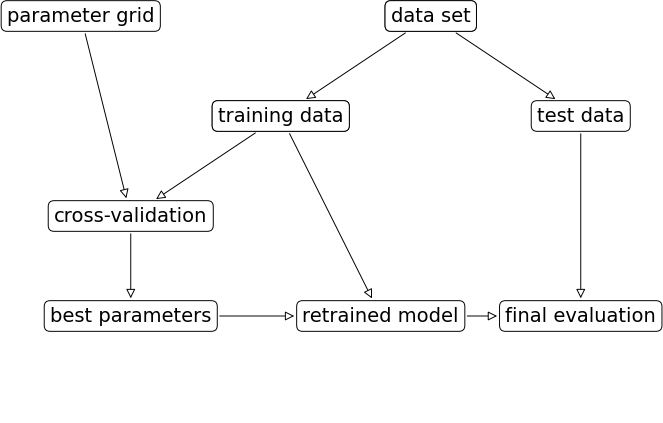

In [84]:
mglearn.plots.plot_grid_search_overview()

In [102]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter grid: \n{}'.format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
grid_search.fit(X_train, y_train)

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [104]:
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [107]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [108]:
print('Best estimator: \n{}'.format(grid_search.best_estimator_))

Best estimator: 
SVC(C=10, gamma=0.1)


#### 分析交叉验证的结果

In [111]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000720,0.000413,0.000305,0.000407,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000861,0.000446,0.000266,0.000532,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001063,0.000114,0.000000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000401,0.000491,0.000201,0.000401,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000400,0.000490,0.000200,0.000400,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


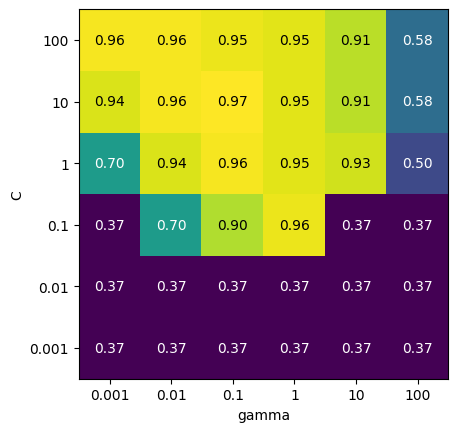

In [117]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'])
plt.show()

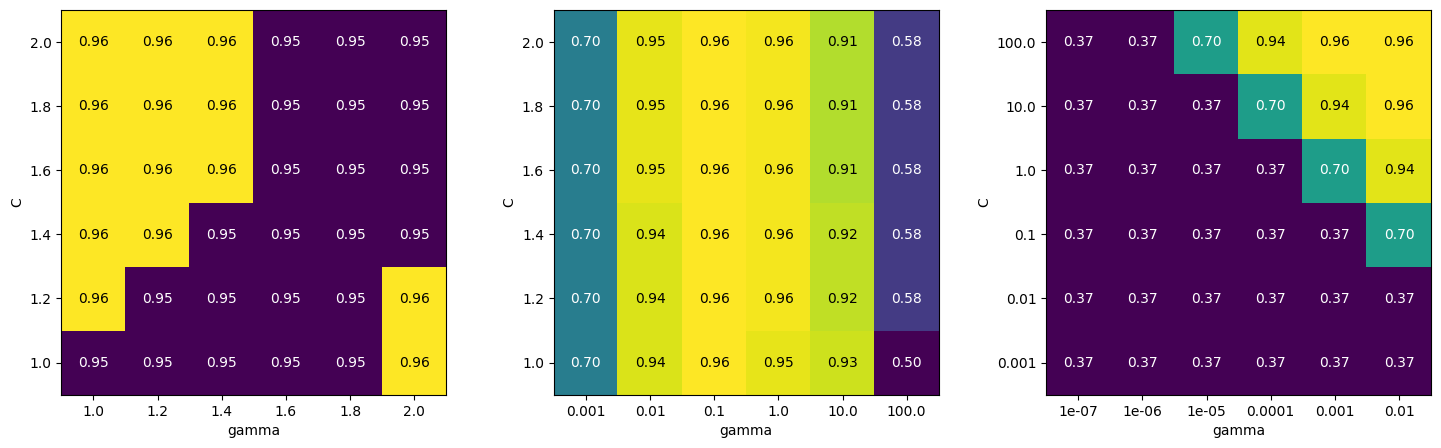

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}

# 10^-3至10^2
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], ax=ax)

- 第一张图没有显示任何变化，整个参数网格的颜色相同。在这种情况下，这是由参数 C 和
gamma 不正确的缩放以及不正确的范围造成的。但如果对于不同的参数设置都看不到精度
的变化，也可能是因为这个参数根本不重要。通常最好在开始时尝试非常极端的值，以观
察改变参数是否会导致精度发生变化。
- 第二张图显示的是垂直条形模式。这表示只有 gamma 的设置对精度有影响。这可能意味
着 gamma 参数的搜索范围是我们所关心的，而 C 参数并不是——也可能意味着 C 参数并
不重要。
- 第三张图中 C 和 gamma 对应的精度都有变化。但可以看到，在图像的整个左下角都没有发
生什么有趣的事情。我们在后面的网格搜索中可以不考虑非常小的值。最佳参数设置出现
在右上角。由于最佳参数位于图像的边界，所以我们可以认为，在这个边界之外可能还有
更好的取值，我们可能希望改变搜索范围以包含这一区域内的更多参数。

#### 在非网格的空间中搜索

In [8]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [136]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [137]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000806,0.000101,0.000511,0.001055,0.000456,0.000201,0.000301,0.000602,0.000704,0.0006,...,0.0,0.000286,0.001001,0.0008,0.000476,0.000301,0.0002,0.0002,0.0004,0.0002
std_fit_time,0.000248,0.000202,0.000459,0.000088,0.000564,0.000402,0.000401,0.000492,0.000402,0.00049,...,0.0,0.000374,0.000001,0.0004,0.000594,0.000401,0.0004,0.0004,0.00049,0.0004
mean_score_time,0.0,0.00045,0.000298,0.0,0.000401,0.000608,0.000603,0.000401,0.0,0.0,...,0.0,0.0,0.0,0.0002,0.0002,0.0002,0.0004,0.0002,0.0,0.0002
std_score_time,0.0,0.000556,0.000597,0.0,0.000491,0.000497,0.000492,0.000491,0.0,0.0,...,0.0,0.0,0.0,0.0004,0.0004,0.0004,0.00049,0.0004,0.0,0.0004
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


#### 使用不同的交叉验证策略进行网格搜索

##### 嵌套交叉验证

In [142]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print('Cross-validation scores: ', scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


嵌套交叉验证的结果可以总结为“SVC 在 iris 数据集上的交叉验证平均精度为 98%”——不多也不少。

In [5]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]
            ):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [10]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5),
                   SVC, ParameterGrid(param_grid))
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


## 评估指标与评分

### 牢记最终目标

### 二分类指标

#### 错误类型

#### 不平衡数据集

#### 混淆矩阵

#### 考虑不确定性

#### 准确率-召回率曲线

#### 受试者工作特征（ROC）与AUC

### 多分类指标

### 回归指标

### 在模型选择中使用评估指标

## 小结与展望